In [64]:
# scp hoech@vca-gpu-211-01:fl_distill/results/trash/* /home/fe/hoech/fl_distill/results/trash

In [60]:
import numpy as np
from matplotlib import pyplot as plt
import itertools

In [61]:
import experiment_manager as xpm

In [62]:
path = "/home/fe/hoech/fl_distill/results/noniid"
list_of_experiments = xpm.get_list_of_experiments(path, only_finished=False)

Loaded  50  Results from  /home/fe/hoech/fl_distill/results/trash

Hyperparameters: 
 {'dataset': ['cifar10'], 'distill_dataset': ['stl10'], 'net': ['lenet_cifar'], 'n_clients': [20], 'classes_per_client': [10000, 1, 0.1, 0.01, 10, 0.001, 1000, 100], 'balancedness': [1.0], 'communication_rounds': [30, 20, 50, 10], 'participation_rate': [0.1, 0.2, 0.4, 0.3, 0.5, 0.6], 'local_epochs': [20], 'distill_epochs': [10], 'n_distill': [100000], 'batch_size': [128], 'aggregation_mode': ['FD'], 'distill_mode': ['pate'], 'only_linear': [False], 'pretrained': [{'stl10': 'simclr_net_bn_stl10_80epochs.pth'}], 'save_model': [None], 'log_frequency': [-100], 'log_path': ['trash/'], 'job_id': [[134913], [134910], [134104], [134911], [135277], [134912], [135278], [135266], [135276]], 'finished': [True, False], 'log_id': [11860, 45988, 61740, 5514, 75392, 60085, 6606, 21799, 99218, 91584, 51802, 76846, 60737, 56999, 42852, 49123, 55462, 86259, 15153, 99716, 86283, 99260, 85836, 96407, 85747, 79998, 5722, 13

In [63]:
list_of_experiments[0].hyperparameters['job_id']

[134913]

In [64]:
select_experiment_1('job_id', [135277])

Hyperparameters: 
 - dataset                 cifar10
 - distill_dataset         stl10
 - net                     lenet_cifar
 - n_clients               20
 - classes_per_client      0.1
 - balancedness            1.0
 - communication_rounds    10
 - participation_rate      0.4
 - local_epochs            20
 - distill_epochs          10
 - n_distill               100000
 - batch_size              128
 - aggregation_mode        FD
 - distill_mode            pate
 - only_linear             False
 - pretrained              {'stl10': 'simclr_net_bn_stl10_80epochs.pth'}
 - save_model              None
 - log_frequency           -100
 - log_path                trash/
 - job_id                  [135277]
 - finished                True
 - log_id                  51802

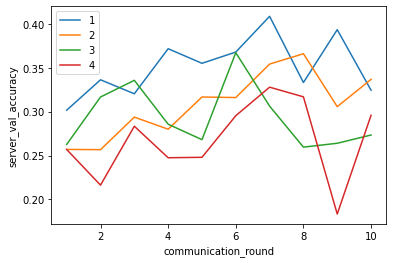

In [65]:
experiment1 = select_experiment_1('job_id', [135266])
experiment2 = select_experiment_1('job_id', [135277])
experiment3 = select_experiment_1('job_id', [135276])
experiment4 = select_experiment_1('job_id', [135278])
plt.plot(experiment1.results['communication_round'], experiment1.results['server_val_accuracy'][1:], label='1')
plt.plot(experiment2.results['communication_round'], experiment2.results['server_val_accuracy'][1:], label='2')
plt.plot(experiment3.results['communication_round'], experiment3.results['server_val_accuracy'][1:], label ='3')
plt.plot(experiment4.results['communication_round'], experiment4.results['server_val_accuracy'][1:], label = '4')
plt.xlabel('communication_round')
plt.ylabel('server_val_accuracy')
plt.legend()

In [66]:
participation_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
alphas = sorted([10000, 1, 0.1, 0.01, 10, 0.001, 1000, 100])

In [67]:
alphas

[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [68]:
def select_experiment_1(hyperparameter1, value1):
    for experiment in list_of_experiments:
        if experiment.hyperparameters[hyperparameter1]==value1:
            return experiment
    print('no such experiment')

In [69]:
select_experiment_1('classes_per_client',alphas[3])

Hyperparameters: 
 - dataset                 cifar10
 - distill_dataset         stl10
 - net                     lenet_cifar
 - n_clients               20
 - classes_per_client      1
 - balancedness            1.0
 - communication_rounds    20
 - participation_rate      0.2
 - local_epochs            20
 - distill_epochs          10
 - n_distill               100000
 - batch_size              128
 - aggregation_mode        FD
 - distill_mode            pate
 - only_linear             False
 - pretrained              {'stl10': 'simclr_net_bn_stl10_80epochs.pth'}
 - save_model              None
 - log_frequency           -100
 - log_path                trash/
 - job_id                  [134910]
 - finished                True
 - log_id                  45988

In [70]:
def select_experiment_2(hyperparameter1, value1, hyperparameter2, value2):
    for experiment in list_of_experiments:
        if experiment.hyperparameters[hyperparameter1]==value1:
            #print(experiment.hyperparameters[hyperparameter2]==value2)
            if experiment.hyperparameters[hyperparameter2]==value2:
                return experiment

In [71]:
experiment = select_experiment_2('participation_rate', participation_rates[0], 'classes_per_client', alphas[3])

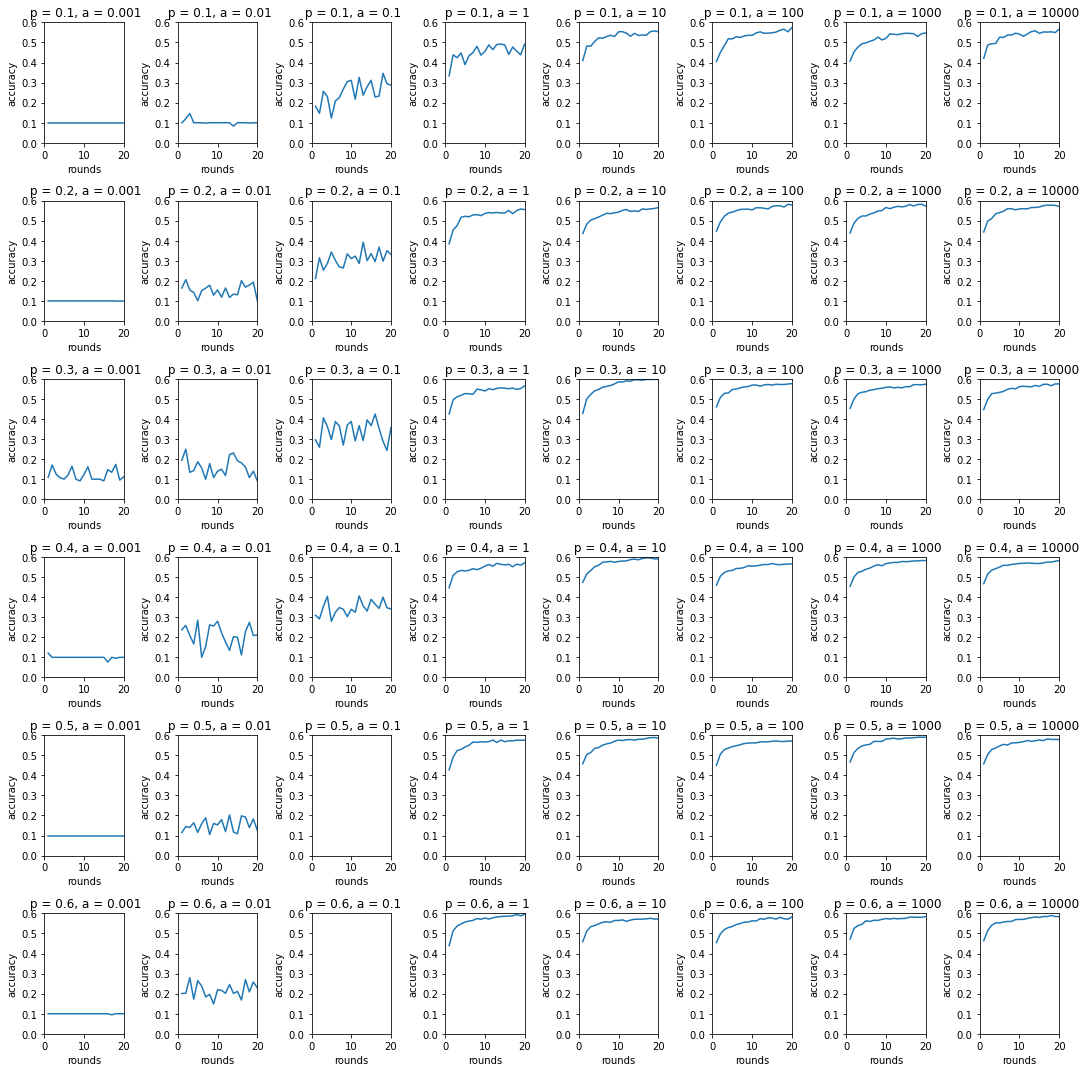

In [72]:
rows, cols = len(participation_rates), len(alphas)
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
for x, y in itertools.product(range(rows), range(cols)):
    experiment = select_experiment_2('participation_rate', participation_rates[x], 'classes_per_client', alphas[y])
    if experiment:
        ax[x, y].plot(experiment.results['communication_round'][:20], experiment.results['server_val_accuracy'][1:21])
    ax[x, y].set_xlabel('rounds')
    ax[x, y].set_ylabel('accuracy')
    ax[x, y].set_xlim(0,20)
    ax[x, y].set_ylim(0, 0.6)
    ax[x, y].set_title(' p = ' + str(participation_rates[x]) + ', a = ' + str(alphas[y]))

fig.tight_layout()

#for ax in fig.get_axes():
#    ax.label_outer()

In [ ]:
for participation_rate in np.arange(0.1,0.7, 0.1):
    for alpha in [0.001, 0.01, 0.1, 10000000]:
        

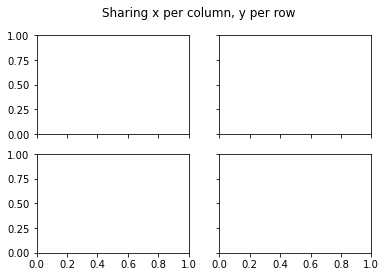

In [72]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
#ax1.plot(x, y)
#ax2.plot(x, y**2, 'tab:orange')
#ax3.plot(x, -y, 'tab:green')
#ax4.plot(x, -y**2, 'tab:red')


for ax in fig.get_axes():
    ax.label_outer()

In [63]:
list_of_experiments

[Hyperparameters: 
  - dataset                 cifar10
  - distill_dataset         stl10
  - net                     lenet_cifar
  - n_clients               20
  - classes_per_client      0.1
  - balancedness            1.0
  - communication_rounds    50
  - participation_rate      0.4
  - local_epochs            20
  - distill_epochs          10
  - n_distill               100000
  - batch_size              128
  - aggregation_mode        FD
  - distill_mode            pate
  - only_linear             False
  - pretrained              {'stl10': 'simclr_net_bn_stl10_80epochs.pth'}
  - save_model              None
  - log_frequency           -100
  - log_path                trash/
  - job_id                  [134104]
  - finished                False
  - log_id                  61740,
 Hyperparameters: 
  - dataset                 cifar10
  - distill_dataset         stl10
  - net                     lenet_cifar
  - n_clients               20
  - classes_per_client      0.01
  - balanced

In [73]:
experiment = list_of_experiments[0]

In [74]:
experiment

Hyperparameters: 
 - dataset                 cifar10
 - distill_dataset         stl10
 - net                     lenet_cifar
 - n_clients               20
 - classes_per_client      0.1
 - balancedness            1.0
 - communication_rounds    50
 - participation_rate      0.4
 - local_epochs            20
 - distill_epochs          10
 - n_distill               100000
 - batch_size              128
 - aggregation_mode        FD
 - distill_mode            pate
 - only_linear             False
 - pretrained              {'stl10': 'simclr_net_bn_stl10_80epochs.pth'}
 - save_model              None
 - log_frequency           -100
 - log_path                trash/
 - job_id                  [134104]
 - finished                False
 - log_id                  61740

In [62]:
[(experiment.hyperparameters['classes_per_client'], experiment.hyperparameters['participation_rate']) for experiment in list_of_experiments]


[(0.1, 0.4),
 (0.01, 0.3),
 (10000000, 0.4),
 (0.001, 0.1),
 (0.1, 0.3),
 (0.1, 0.1),
 (0.001, 0.4),
 (0.01, 0.6),
 (0.001, 0.5),
 (0.01, 0.2),
 (0.01, 0.4),
 (0.001, 0.2),
 (0.001, 0.6),
 (10000000, 0.4),
 (0.001, 0.3),
 (10000000, 0.4),
 (0.01, 0.5),
 (0.1, 0.2),
 (0.01, 0.1)]

Text(0.5, 1.0, 'pretrained, 30 rounds')

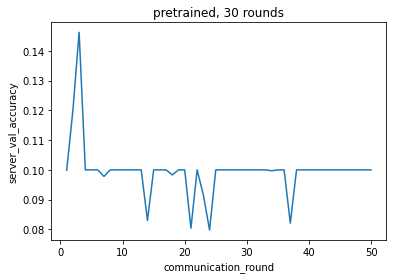

In [51]:
plt.plot(experiment.results['communication_round'], experiment.results['server_val_accuracy'][1:])
plt.xlabel('communication_round')
plt.ylabel('server_val_accuracy')
plt.title('pretrained, 30 rounds')

Text(0.5, 1.0, 'not pretrained, 20 rounds')

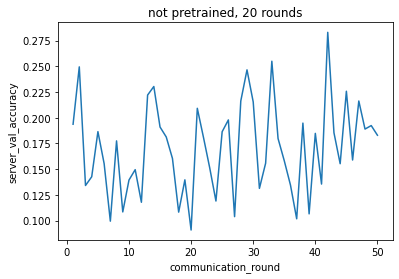

In [8]:
plt.plot(list_of_experiments[1].results['communication_round'], list_of_experiments[1].results['server_val_accuracy'][1:])
plt.xlabel('communication_round')
plt.ylabel('server_val_accuracy')
plt.title('not pretrained, 20 rounds')

Text(0, 0.5, 'distill_loss')

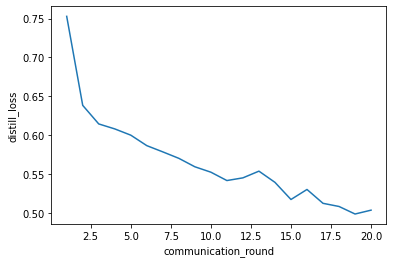

In [92]:
plt.plot(list_of_experiments[1].results['communication_round'], list_of_experiments[1].results['distill_loss'])
plt.xlabel('communication_round')
plt.ylabel('distill_loss')